In [1]:
data = {
    ('Low', '1000 kg/day'): [1.24, 0.08, 0.14, 0.78, 0.08, 0.04, 1.24, 0.07, 0.40],
    ('Low', '2000 kg/day'): [1.22, 0.08, 0.13, 0.51, 0.05, 0.04, 1.22, 0.07, 0.40],
    ('Low', '3000 kg/day'): [1.17, 0.08, 0.11, 0.48, 0.05, 0.04, 1.17, 0.07, 0.40],
    ('Medium', '1000 kg/day'): [0.91, 0.06, 0.14, 0.98, 0.09, 0.04, 0.91, 0.06, 0.40],
    ('Medium', '2000 kg/day'): [0.88, 0.06, 0.13, 0.37, 0.05, 0.04, 0.96, 0.06, 0.40],
    ('Medium', '3000 kg/day'): [0.83, 0.06, 0.11, 0.35, 0.04, 0.04, 0.97, 0.06, 0.40],
    ('High', '1000 kg/day'): [0.81, 0.06, 0.14, 0.52, 0.07, 0.04, 0.81, 0.05, 0.40],
    ('High', '2000 kg/day'): [0.79, 0.06, 0.13, 0.33, 0.04, 0.04, 0.86, 0.05, 0.40],
    ('High', '3000 kg/day'): [0.74, 0.05, 0.11, 0.31, 0.04, 0.04, 0.85, 0.05, 0.40]
}

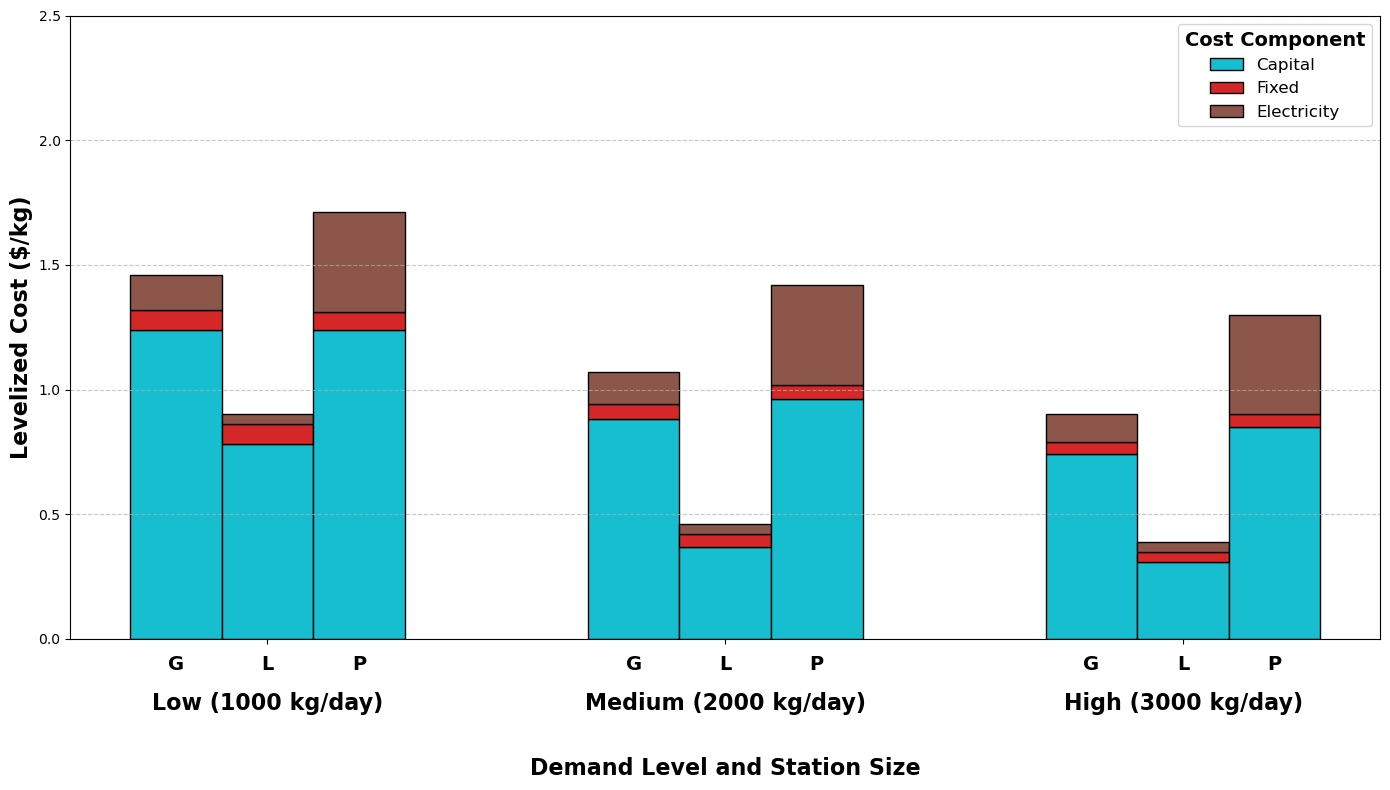

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Your exact provided data (selected explicitly for Low-1000, Medium-2000, High-3000)
data = {
    ('Low', '1000 kg/day'): [1.24, 0.08, 0.14, 0.78, 0.08, 0.04, 1.24, 0.07, 0.40],
    ('Medium', '2000 kg/day'): [0.88, 0.06, 0.13, 0.37, 0.05, 0.04, 0.96, 0.06, 0.40],
    ('High', '3000 kg/day'): [0.74, 0.05, 0.11, 0.31, 0.04, 0.04, 0.85, 0.05, 0.40]
}

index = pd.MultiIndex.from_tuples(data.keys(), names=['Demand Level', 'Station Size'])
columns = ['Gas Capital', 'Gas Fixed', 'Gas Electric', 
           'LH2 Capital', 'LH2 Fixed', 'LH2 Electric', 
           'Pipe Capital', 'Pipe Fixed', 'Pipe Electric']

df = pd.DataFrame(data.values(), index=index, columns=columns)

# Define plot parameters
scenarios = ['Low (1000 kg/day)', 'Medium (2000 kg/day)', 'High (3000 kg/day)']
demand_levels = ['Low', 'Medium', 'High']
station_sizes = ['1000 kg/day', '2000 kg/day', '3000 kg/day']
delivery_modes = ['Gas', 'LH2', 'Pipe']
mode_labels = ['G', 'L', 'P']
colors = ['#17becf', '#d62728', '#8c564b']

bar_width = 0.2
x = np.arange(len(scenarios))

fig, ax = plt.subplots(figsize=(14,8))

# Plot clearly structured bars
for i, (demand, size) in enumerate(zip(demand_levels, station_sizes)):
    for j, mode in enumerate(delivery_modes):
        capital = df.loc[(demand, size), f'{mode} Capital']
        fixed = df.loc[(demand, size), f'{mode} Fixed']
        electric = df.loc[(demand, size), f'{mode} Electric']

        position = x[i] + (j - 1) * bar_width

        ax.bar(position, capital, bar_width, color=colors[0], edgecolor='black', label='Capital' if i == j == 0 else "")
        ax.bar(position, fixed, bar_width, bottom=capital, color=colors[1], edgecolor='black', label='Fixed' if i == j == 0 else "")
        ax.bar(position, electric, bar_width, bottom=capital+fixed, color=colors[2], edgecolor='black', label='Electricity' if i == j == 0 else "")

# X-axis main labels (Low, Medium, High scenarios)
ax.set_xticks(x)
ax.set_xticklabels(scenarios, fontsize=16, fontweight='bold')

# Explicitly add G, L, P labels clearly beneath each bar
for i in range(len(scenarios)):
    for j, label in enumerate(mode_labels):
        pos = x[i] + (j - 1) * bar_width
        ax.text(pos, -0.05, label, ha='center', fontsize=14, fontweight='bold', transform=ax.get_xaxis_transform())

ax.set_xlabel('Demand Level and Station Size', fontsize=16, fontweight='bold', labelpad=30)
ax.set_ylabel('Levelized Cost ($/kg)', fontsize=16, fontweight='bold')
ax.tick_params(axis='x', pad=35)

ax.set_ylim(0, 2.5)
ax.grid(axis='y', linestyle='--', alpha=0.7)

legend = ax.legend(title='Cost Component', fontsize=12, title_fontsize=14)
legend.get_title().set_fontweight('bold')

plt.tight_layout()
plt.show()


KeyError: ('Medium', '1000 kg/day')

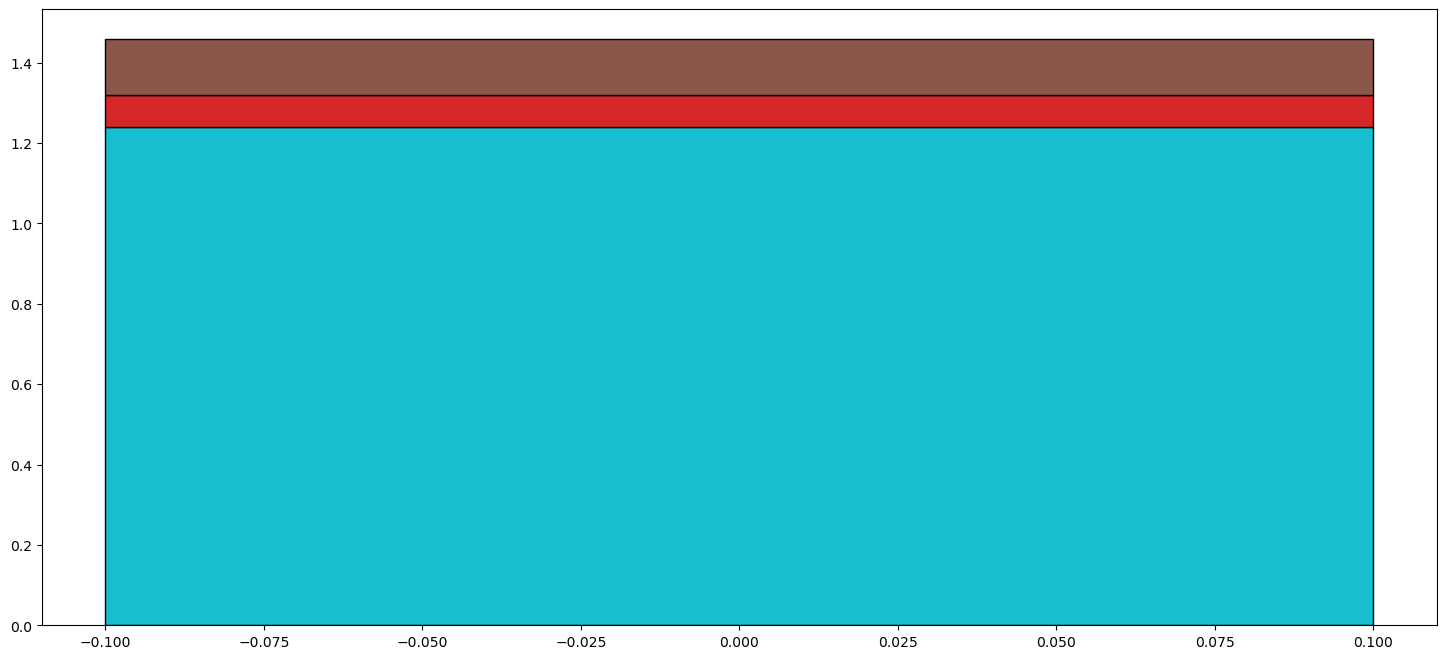

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Your provided data

index = pd.MultiIndex.from_tuples(data.keys(), names=['Demand Level', 'Station Size'])
columns = ['Gas Capital', 'Gas Fixed', 'Gas Electric',
           'LH2 Capital', 'LH2 Fixed', 'LH2 Electric',
           'Pipe Capital', 'Pipe Fixed', 'Pipe Electric']

df = pd.DataFrame(data.values(), index=index, columns=columns)

# Parameters
station_sizes = ['1000 kg/day', '2000 kg/day', '3000 kg/day']
delivery_modes = ['Gas', 'LH2', 'Pipe']
mode_labels = ['G', 'L', 'P']
demand_levels = ['Low', 'Medium', 'High']
colors = ['#17becf', '#d62728', '#8c564b']
bar_width = 0.2

# Plot Setup
fig, ax = plt.subplots(figsize=(18, 8))

# Calculate positions
group_width = len(demand_levels) * bar_width + 0.1
total_group_width = len(delivery_modes) * group_width + 0.4
x = np.arange(len(station_sizes)) * total_group_width

# Plotting clearly separated bars
for i, size in enumerate(station_sizes):
    for j, mode in enumerate(delivery_modes):
        for k, demand in enumerate(demand_levels):
            capital = df.loc[(demand, size), f'{mode} Capital']
            fixed = df.loc[(demand, size), f'{mode} Fixed']
            electric = df.loc[(demand, size), f'{mode} Electric']

            bar_position = x[i] + j * group_width + k * bar_width

            ax.bar(bar_position, capital, bar_width, color=colors[0], edgecolor='black',
                   label='Capital' if (i == j == k == 0) else "")
            ax.bar(bar_position, fixed, bar_width, bottom=capital, color=colors[1], edgecolor='black',
                   label='Fixed' if (i == j == k == 0) else "")
            ax.bar(bar_position, electric, bar_width, bottom=capital + fixed, color=colors[2], edgecolor='black',
                   label='Electricity' if (i == j == k == 0) else "")

# X-axis labeling for station sizes
ax.set_xticks(x + total_group_width / 2 - group_width / 2)
ax.set_xticklabels(station_sizes, fontsize=16, fontweight='bold')

# Delivery mode labels and Demand Level labels beneath bars
for i, size in enumerate(station_sizes):
    for j, mode_label in enumerate(mode_labels):
        mode_position = x[i] + j * group_width + (bar_width * len(demand_levels)) / 2 - bar_width / 2
        ax.text(mode_position, -0.1, mode_label, ha='center', fontsize=14, fontweight='bold', transform=ax.get_xaxis_transform())
        for k, demand in enumerate(['L', 'M', 'H']):
            demand_position = x[i] + j * group_width + k * bar_width
            ax.text(demand_position, -0.05, demand, ha='center', fontsize=12, transform=ax.get_xaxis_transform())

# Final adjustments
ax.set_xlabel('Station Size', fontsize=16, fontweight='bold', labelpad=50)
ax.set_ylabel('Levelized Cost ($/kg)', fontsize=16, fontweight='bold')
ax.tick_params(axis='x', pad=70)
ax.set_ylim(0, 2.5)
ax.grid(axis='y', linestyle='--', alpha=0.7)

legend = ax.legend(title='Cost Component', fontsize=12, title_fontsize=14)
legend.get_title().set_fontweight('bold')

plt.tight_layout()
plt.show()


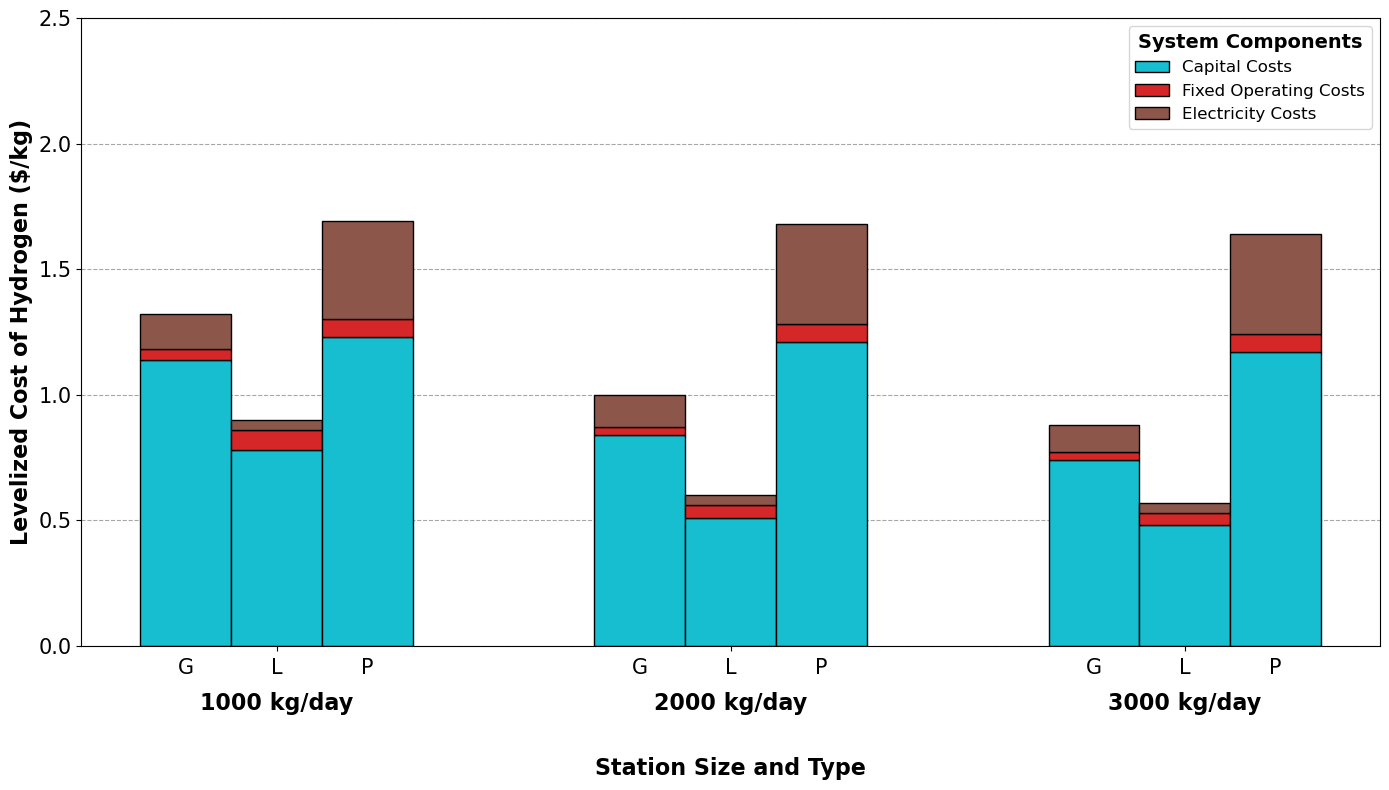

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Manually inputting the relevant data
data = {
    'Station Size': ['1000 kg/day', '2000 kg/day', '3000 kg/day'],
    'Gas Capital Costs': [1.14, 0.84, 0.74],
    'Gas Fixed Operating Costs': [0.04, 0.03, 0.03],
    'Gas Electricity Costs': [0.14, 0.13, 0.11],
    'LH2 Capital Costs': [0.78, 0.51, 0.48],
    'LH2 Fixed Operating Costs': [0.08, 0.05, 0.05],
    'LH2 Electricity Costs': [0.04, 0.04, 0.04],
    'Pipeline Capital Costs': [1.23, 1.21, 1.17],
    'Pipeline Fixed Operating Costs': [0.07, 0.07, 0.07],
    'Pipeline Electricity Costs': [0.39, 0.40, 0.40]
}

df = pd.DataFrame(data)
df.set_index('Station Size', inplace=True)

# Prepare data for plotting
station_sizes = df.index
station_types = ['Gas', 'LH2', 'Pipeline']
bar_width = 0.2  # Width of each bar
x = np.arange(len(station_sizes))

# Colorblind-friendly palette
palette = sns.color_palette("colorblind", n_colors=8)  # Ensure it’s large enough

capital_costs_color = "#17becf"  # Bold cyan
fixed_costs_color = "#d62728"    # Dark pink
electricity_costs_color = "#8c564b"  # Olive green

station_types = ['Gas', 'LH2', 'Pipeline']
bar_width = 0.2
x = np.arange(len(df.index))

fig, ax = plt.subplots(figsize=(14, 8))
for i, station_type in enumerate(station_types):
    capital_costs = df[f'{station_type} Capital Costs']
    fixed_costs = df[f'{station_type} Fixed Operating Costs']
    electricity_costs = df[f'{station_type} Electricity Costs']
    bar_positions = x + i * bar_width

    # Stacked bar plot
    ax.bar(bar_positions, capital_costs, bar_width, label='Capital Costs' if i == 0 else "", 
           color=capital_costs_color, edgecolor='black')
    ax.bar(bar_positions, fixed_costs, bar_width, bottom=capital_costs, 
           label='Fixed Operating Costs' if i == 0 else "", color=fixed_costs_color, edgecolor='black')
    ax.bar(bar_positions, electricity_costs, bar_width, bottom=capital_costs + fixed_costs, 
           label='Electricity Costs' if i == 0 else "", color=electricity_costs_color, edgecolor='black')

ax.set_xticks(x + bar_width)
ax.set_xticklabels(df.index, fontsize=16, fontweight='bold')

# Move the station size labels further down using labelpad
ax.tick_params(axis='x', which='both', pad=30)  # Adjust pad to move down station size labels

# Position G, L, P labels right under the bars
for i in range(len(station_sizes)):
    for j, label in enumerate(['G', 'L', 'P']):
        ax.text(
            i + j * bar_width, -0.02, label, ha='center', va='top', 
            fontsize=15, transform=ax.get_xaxis_transform()
        )  # Slightly above the station size labels

plt.setp(ax.get_yticklabels(), fontsize=15)
ax.set_xlabel('Station Size and Type', fontsize=16, labelpad=30, fontweight='bold')
ax.set_ylabel('Levelized Cost of Hydrogen ($/kg)', fontsize=16, fontweight='bold')
#ax.set_title('Station Costs by Size and Type', fontsize=35, fontweight='bold')
ax.set_ylim(0, 2.5)
ax.set_axisbelow(True)
ax.grid(axis='y', linestyle='--', color='gray', alpha=0.7)

# Add legend
legend = ax.legend(title='System Components', fontsize=12, title_fontsize=14)
legend.get_title().set_fontweight('bold') 
plt.tight_layout()
plt.savefig("Final Plots/ Station_Costs_by_Size_and_Type.png")
plt.show()


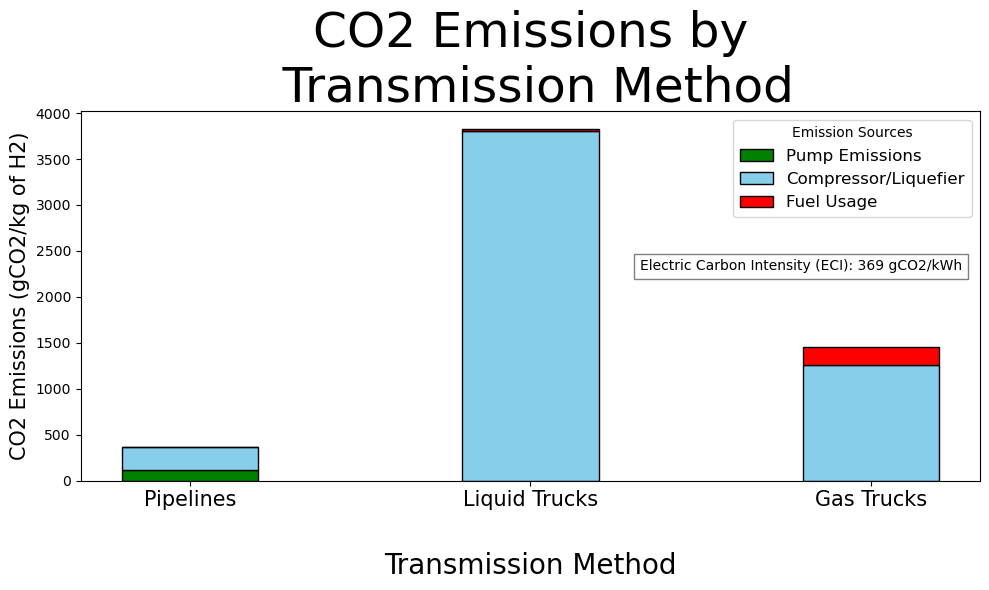

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Manually inputting the relevant data for Transmission Method, Compressor/Liquefier Emissions, Fuel Emissions, and Pump Emissions
data = {
    'Transmission Method': ['Pipelines', 'Liquid Trucks', 'Gas Trucks'],
    'Compressor/Liquefier Emissions': [256.9, 3800, 1259],  # Compressor for Pipelines and Gas Trucks, Liquefier for Liquid Trucks
    'Fuel Emissions': [0, 27, 200],  # Sample data for fuel emissions
    'Pump Emissions': [112.1, 0.0, 0.0]  # Pump emissions only for Pipelines, set to 0 for others
}

# Creating a DataFrame from this data
df = pd.DataFrame(data)

# Set the 'Transmission Method' column as the index for easier plotting
df.set_index('Transmission Method', inplace=True)

# Prepare data for plotting
transmission_methods = df.index
bar_width = 0.4  # Width of each bar
x = np.arange(len(transmission_methods))

# Initialize plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot pump emissions
ax.bar(x, df['Pump Emissions'], bar_width, label='Pump Emissions', color='green', edgecolor='black')

# Plot compressor/liquefier emissions stacked on top of pump emissions
ax.bar(x, df['Compressor/Liquefier Emissions'], bar_width, bottom=df['Pump Emissions'], label='Compressor/Liquefier', color='skyblue', edgecolor='black')

# Plot fuel emissions stacked on top of compressor/liquefier emissions
ax.bar(x, df['Fuel Emissions'], bar_width, bottom=df['Pump Emissions'] + df['Compressor/Liquefier Emissions'], label='Fuel Usage', color='red', edgecolor='black')

# Adjust x-axis tick positions and labels
ax.set_xticks(x)
ax.set_xticklabels(transmission_methods, fontsize=15)

# Set y-axis label
ax.set_ylabel('CO2 Emissions (gCO2/kg of H2)', fontsize=15)

# Set x-axis label
ax.set_xlabel('Transmission Method', fontsize=20, labelpad=30)

# Set the title
ax.set_title('CO2 Emissions by\n Transmission Method', fontsize=35)

# Add legend
ax.legend(title='Emission Sources', fontsize=12)

# Adding a custom text for the Electric Carbon Intensity (ECI) value
# You can adjust the text location as per your requirement
eci_value = "Electric Carbon Intensity (ECI): 369 gCO2/kWh"  # Example ECI value
ax.text(0.98, 0.6, eci_value, fontsize=10, color='black',
        verticalalignment='top', horizontalalignment='right', 
        bbox=dict(facecolor='white', alpha=0.5),
        transform=ax.transAxes)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


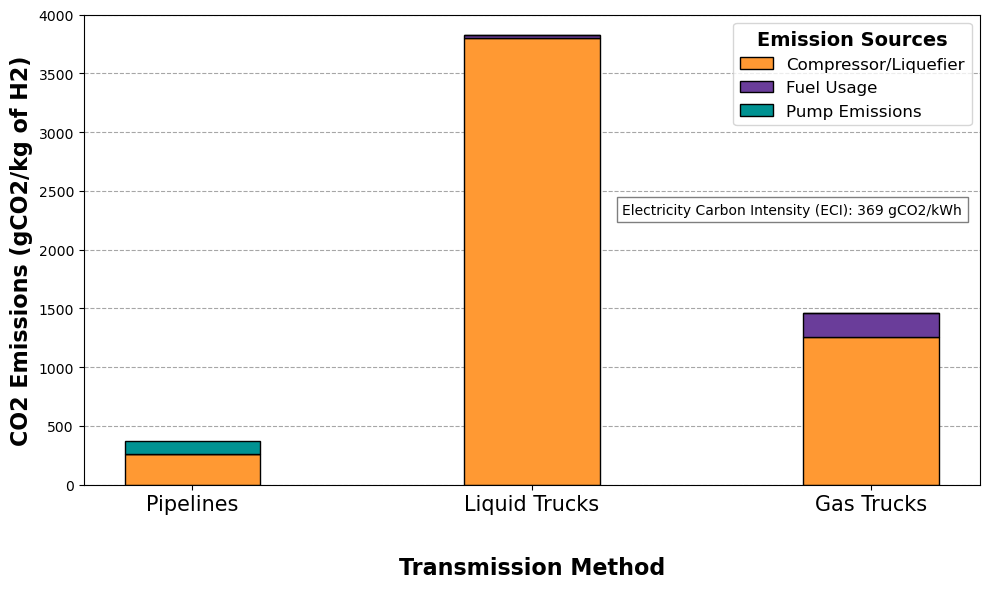

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Manually inputting the relevant data for Transmission Method, Compressor/Liquefier Emissions, Fuel Emissions, and Pump Emissions
data = {
    'Transmission Method': ['Pipelines', 'Liquid Trucks', 'Gas Trucks'],
    'Compressor/Liquefier Emissions': [256.9, 3800, 1259],  # Compressor for Pipelines and Gas Trucks, Liquefier for Liquid Trucks
    'Fuel Emissions': [0, 27, 200],  # Sample data for fuel emissions
    'Pump Emissions': [112.1, 0.0, 0.0]  # Pump emissions only for Pipelines, set to 0 for others
}

# Creating a DataFrame from this data
df = pd.DataFrame(data)
df.set_index('Transmission Method', inplace=True)

# Prepare data for plotting
transmission_methods = df.index
bar_width = 0.4
x = np.arange(len(transmission_methods))

# Define custom colorblind-friendly colors
pump_color = "#009292"  # Dark turquoise
fuel_color = "#6a3d9a"  # Deep purple
compressor_color = "#ff9933"  # Bold amber

# Initialize plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot emissions using the custom colorblind-friendly palette

# Stacking Compressor/Liquefier Emissions at the bottom
ax.bar(x, df['Compressor/Liquefier Emissions'], bar_width, label='Compressor/Liquefier', color=compressor_color, edgecolor='black')

# Stacking Fuel Emissions on top of Compressor/Liquefier
ax.bar(x, df['Fuel Emissions'], bar_width, bottom=df['Compressor/Liquefier Emissions'], label='Fuel Usage', color=fuel_color, edgecolor='black')

# Stacking Pump Emissions on top of Fuel Emissions
ax.bar(x, df['Pump Emissions'], bar_width, bottom=df['Compressor/Liquefier Emissions'] + df['Fuel Emissions'], label='Pump Emissions', color=pump_color, edgecolor='black')


# Adjust x-axis tick positions and labels
ax.set_xticks(x)
ax.set_xticklabels(transmission_methods, fontsize=15)

# Set axis labels and title
ax.set_ylabel('CO2 Emissions (gCO2/kg of H2)', fontsize=16, fontweight = 'bold')
ax.set_ylim(0,4000)
ax.set_xlabel('Transmission Method', fontsize=16, labelpad=30, fontweight = 'bold')
#ax.set_title('CO2 Emissions by\n Transmission Method', fontsize=35)

# Add legend
legend = ax.legend(title='Emission Sources', fontsize=12, title_fontsize=14)
legend.get_title().set_fontweight('bold') 
ax.set_axisbelow(True)
ax.grid(axis='y', linestyle='--', color='gray', alpha=0.7)


# Adding a custom text for the Electric Carbon Intensity (ECI) value
eci_value = "Electricity Carbon Intensity (ECI): 369 gCO2/kWh"  # Example ECI value
ax.text(0.98, 0.6, eci_value, fontsize=10, color='black',
        verticalalignment='top', horizontalalignment='right', 
        bbox=dict(facecolor='white', alpha=0.5),
        transform=ax.transAxes)

# Adjust layout and display the plot
plt.tight_layout()
plt.savefig("Final Plots/ CO2_Emissions_By_Transmission_Method.png")
plt.show()


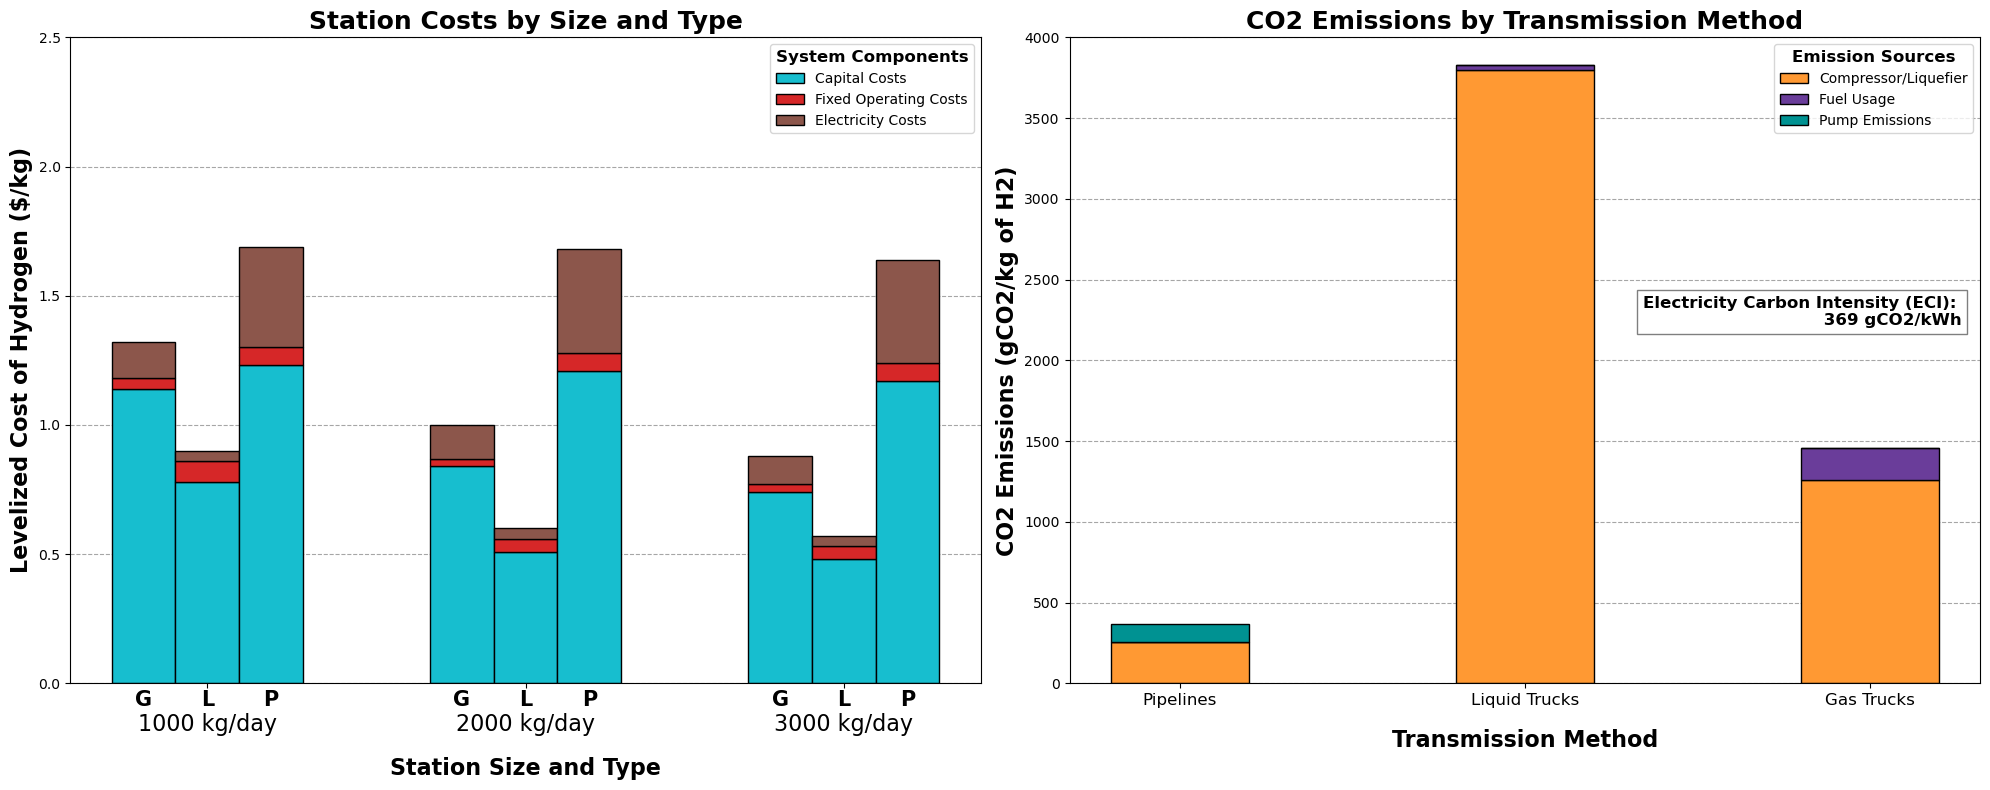

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# -------------------- DATA FOR THE FIRST PLOT -------------------- #
# Data for station costs
data_station = {
    'Station Size': ['1000 kg/day', '2000 kg/day', '3000 kg/day'],
    'Gas Capital Costs': [1.14, 0.84, 0.74],
    'Gas Fixed Operating Costs': [0.04, 0.03, 0.03],
    'Gas Electricity Costs': [0.14, 0.13, 0.11],
    'LH2 Capital Costs': [0.78, 0.51, 0.48],
    'LH2 Fixed Operating Costs': [0.08, 0.05, 0.05],
    'LH2 Electricity Costs': [0.04, 0.04, 0.04],
    'Pipeline Capital Costs': [1.23, 1.21, 1.17],
    'Pipeline Fixed Operating Costs': [0.07, 0.07, 0.07],
    'Pipeline Electricity Costs': [0.39, 0.40, 0.40]
}
df_station = pd.DataFrame(data_station)
df_station.set_index('Station Size', inplace=True)

# Colors for station costs
capital_costs_color = "#17becf"  # Bold cyan
fixed_costs_color = "#d62728"    # Dark pink
electricity_costs_color = "#8c564b"  # Olive green

station_types = ['Gas', 'LH2', 'Pipeline']
bar_width = 0.2
x_station = np.arange(len(df_station.index))

# -------------------- DATA FOR THE SECOND PLOT -------------------- #
# Data for CO2 emissions
data_emissions = {
    'Transmission Method': ['Pipelines', 'Liquid Trucks', 'Gas Trucks'],
    'Compressor/Liquefier Emissions': [256.9, 3800, 1259],
    'Fuel Emissions': [0, 27, 200],
    'Pump Emissions': [112.1, 0.0, 0.0]
}
df_emissions = pd.DataFrame(data_emissions)
df_emissions.set_index('Transmission Method', inplace=True)

# Colors for CO2 emissions
pump_color = "#009292"  # Dark turquoise
fuel_color = "#6a3d9a"  # Deep purple
compressor_color = "#ff9933"  # Bold amber

x_emissions = np.arange(len(df_emissions.index))
bar_width_emissions = 0.4

# -------------------- CREATE SUBPLOTS -------------------- #
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# -------------------- PLOT 1: STATION COSTS -------------------- #
ax1 = axes[0]
for i, station_type in enumerate(station_types):
    capital_costs = df_station[f'{station_type} Capital Costs']
    fixed_costs = df_station[f'{station_type} Fixed Operating Costs']
    electricity_costs = df_station[f'{station_type} Electricity Costs']
    bar_positions = x_station + i * bar_width

    ax1.bar(bar_positions, capital_costs, bar_width, label='Capital Costs' if i == 0 else "", 
            color=capital_costs_color, edgecolor='black')
    ax1.bar(bar_positions, fixed_costs, bar_width, bottom=capital_costs, 
            label='Fixed Operating Costs' if i == 0 else "", color=fixed_costs_color, edgecolor='black')
    ax1.bar(bar_positions, electricity_costs, bar_width, bottom=capital_costs + fixed_costs, 
            label='Electricity Costs' if i == 0 else "", color=electricity_costs_color, edgecolor='black')
# Prepare data for plotting

#Prepare data for plotting
station_sizes = df.index
station_types = ['Gas', 'LH2', 'Pipeline']
bar_width = 0.2  # Width of each bar
x = np.arange(len(station_sizes))

# Colorblind-friendly palette
palette = sns.color_palette("colorblind", n_colors=8)  # Ensure it’s large enough

capital_costs_color = "#17becf"  # Bold cyan
fixed_costs_color = "#d62728"    # Dark pink
electricity_costs_color = "#8c564b"  # Olive green

station_types = ['Gas', 'LH2', 'Pipeline']
bar_width = 0.2
x = np.arange(len(df.index))

# Position G, L, P labels right under the bars
for i in range(len(station_sizes)):
    for j, label in enumerate(['G', 'L', 'P']):
        ax1.text(
            i + j * bar_width, -0.01, label, ha='center', va='top', 
            fontsize=15, fontweight = 'bold',transform=ax1.get_xaxis_transform()
        )  # Slightly above the station size labels
# Set x-ticks properly, adding the bar_width to position labels for each station
ax1.set_xticks(x_station + bar_width)
ax1.set_xticklabels(df_station.index, fontsize=16)
ax1.xaxis.set_tick_params(pad=18) 
ax1.set_xlabel('Station Size and Type', fontsize=16, fontweight='bold', labelpad=15)
ax1.set_ylabel('Levelized Cost of Hydrogen ($/kg)', fontsize=16, fontweight='bold')
ax1.set_ylim(0, 2.5)
ax1.set_title('Station Costs by Size and Type', fontsize=18, fontweight='bold')
legend_1 = ax1.legend(title='System Components', fontsize=10, title_fontsize=12)
legend_1.get_title().set_fontweight('bold') 
ax1.set_axisbelow(True)
ax1.grid(axis='y', linestyle='--', color='gray', alpha=0.7)

# -------------------- PLOT 2: CO2 EMISSIONS -------------------- #
ax2 = axes[1]
ax2.bar(x_emissions, df_emissions['Compressor/Liquefier Emissions'], bar_width_emissions, label='Compressor/Liquefier', color=compressor_color, edgecolor='black')
ax2.bar(x_emissions, df_emissions['Fuel Emissions'], bar_width_emissions, bottom=df_emissions['Compressor/Liquefier Emissions'], label='Fuel Usage', color=fuel_color, edgecolor='black')
ax2.bar(x_emissions, df_emissions['Pump Emissions'], bar_width_emissions, bottom=df_emissions['Compressor/Liquefier Emissions'] + df_emissions['Fuel Emissions'], label='Pump Emissions', color=pump_color, edgecolor='black')

# Adding a custom text for the Electric Carbon Intensity (ECI) value
eci_value = "Electricity Carbon Intensity (ECI): \n 369 gCO2/kWh"  # Example ECI value
ax2.text(0.98, 0.6, eci_value, fontsize=12, color='black',
        verticalalignment='top', horizontalalignment='right', 
        bbox=dict(facecolor='white', alpha=0.5),
        transform=ax2.transAxes, fontweight = 'bold')

ax2.set_xticks(x_emissions)
ax2.set_xticklabels(df_emissions.index, fontsize=12)
ax2.set_xlabel('Transmission Method', fontsize=16, fontweight='bold', labelpad=15)
ax2.set_ylabel('CO2 Emissions (gCO2/kg of H2)', fontsize=16, fontweight='bold')
ax2.set_ylim(0,4000)
ax2.set_title('CO2 Emissions by Transmission Method', fontsize=18, fontweight='bold')
legend_2 = ax2.legend(title='Emission Sources', fontsize=10, title_fontsize=12)
legend_2.get_title().set_fontweight('bold') 
ax2.set_axisbelow(True)
ax2.grid(axis='y', linestyle='--', color='gray', alpha=0.7)

# -------------------- FINAL LAYOUT AND DISPLAY -------------------- #
plt.tight_layout()
plt.savefig("Final Plots/Side_by_Side_Stations_Plots.png")
plt.show()


In [20]:
station_sizes

Index(['1000 kg/day', '2000 kg/day', '3000 kg/day'], dtype='object', name='Station Size')

In [21]:
x

array([0, 1, 2])